# Data Setup

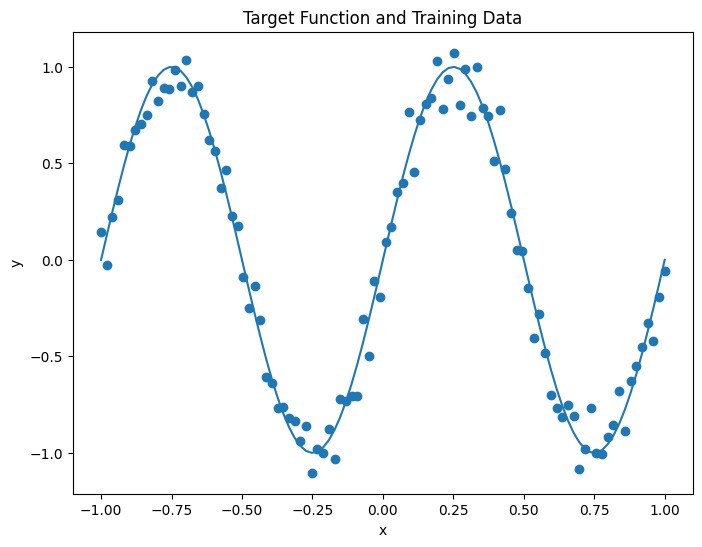

In [30]:
import numpy as np
import matplotlib.pyplot as plt

## Some Graphs ##
# return np.sin(2 * np.pi * x)
# return np.sin(2*np.pi*np.sin(2*np.sin(2*np.sin(x))))

# def target_function(x):
#     return np.sin(2 * np.pi * x)
def target_function(x):
      return np.sin(2 * np.pi * x)

x_train = np.linspace(-1,1,100).reshape(-1,1)
y_true = target_function(x_train)

y_train = y_true + np.random.normal(0 , 0.1, x_train.shape)

plt.figure(figsize=(8,6))
plt.plot(x_train, y_true)
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Target Function and Training Data')
plt.show()

In [ ]:
x_train

# Model Setup

In [31]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20,activation='relu',input_shape=(1,)),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 20)                  │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

None


# Model Training

In [3]:
# TEST #
history = model.fit(x_train, y_train, epochs=10, verbose=1)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.4883
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4282 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3846 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3917 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3783 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3759 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3537 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3084 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2961 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2619 


# Model Visual Output

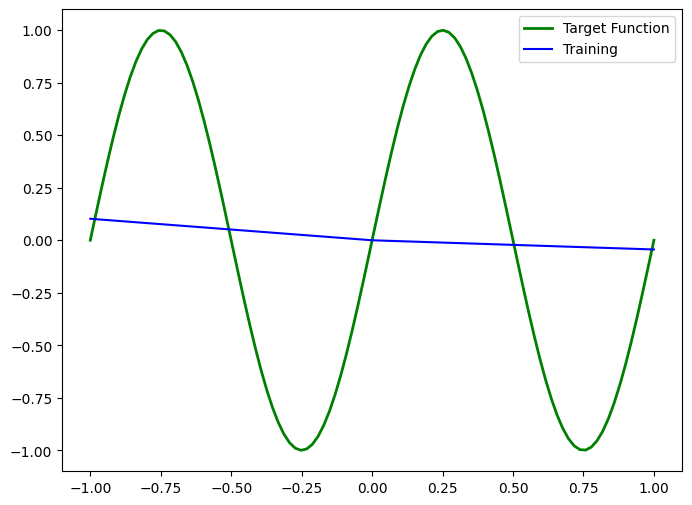

In [12]:
# Test #
y_pred = model.predict(x_train,verbose=0)

plt.figure(figsize=(8,6))
plt.plot(x_train, y_true, label='Target Function', color="green", linewidth=2)
plt.plot(x_train, y_pred, label="Training", color='blue')
plt.legend()
plt.show()

In [22]:
del model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20,activation='relu',input_shape=(1,)),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

# Real Time Visual

In [32]:
#Video Setup
import cv2

output_file = "Training_Visual.mp4"
fourcc = cv2.VideoWriter_fourcc(*'avc1') # avc1 for h246 codec use mp4v if not supported
fps = 10
frame_width, frame_height = 800, 600
video_writer = cv2.VideoWriter(output_file, fourcc, fps, (frame_width,frame_height))

In [33]:
from IPython.display import clear_output

class visualise_output(tf.keras.callbacks.Callback):
  def __init__(self,x_train,y_train, y_true):
    self.x_train = x_train
    self.y_train = y_train
    self.y_true = y_true

  def on_epoch_end(self, epoch, logs=None):
    y_pred = self.model.predict(self.x_train,verbose=0)

    plt.figure(figsize=(8,6))
    plt.plot(self.x_train, self.y_true, label='Target Function', color="green", linewidth=2)
    plt.scatter(self.x_train, self.y_train, label="Noisy Data", alpha=0.6)
    plt.plot(self.x_train, y_pred, label=f"Optimizer at epoch {epoch+1}", color='blue')
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Learning Progress (Epoch {epoch + 1})")

    plt.tight_layout()
    plt.draw()
    canvas = plt.gcf().canvas
    canvas.draw()
    frame = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(canvas.get_width_height()[::-1] + (3,))

    if (epoch+1) % 10 == 0:
      clear_output(wait=True)
      plt.show()

    plt.close()

    frame = cv2.resize(frame,(frame_width,frame_height))
    video_writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

In [34]:
real_time_output = visualise_output(x_train, y_train, y_true)

#Final

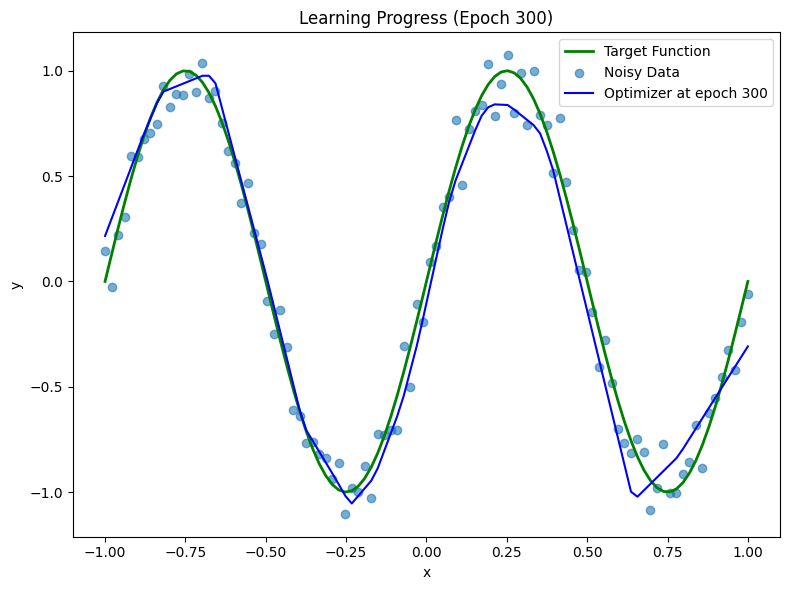

In [35]:
model.fit(x_train, y_train, epochs=300, verbose=0, callbacks=[real_time_output])

In [36]:
#Extend Final Result
extend_duration = 10
frames_to_append = int(fps*extend_duration)

y_pred = model.predict(x_train,verbose=0)

plt.figure(figsize=(8,6))
plt.plot(x_train, y_true, label='Target Function', color="green", linewidth=2)
plt.scatter(x_train, y_train, label="Noisy Data", alpha=0.6)
plt.plot(x_train, y_pred, label=f"Optimizer Predicting", color='blue')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Learning Progress Final Result", color="green")

plt.tight_layout()
plt.draw()
canvas = plt.gcf().canvas
canvas.draw()
frame = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
frame = frame.reshape(canvas.get_width_height()[::-1] + (3,))

plt.close()

frame = cv2.resize(frame,(frame_width,frame_height))
video_writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

for _ in range(frames_to_append):
  video_writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

<ipython-input-36-bad9c761a54f>:20: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  frame = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')


In [37]:
## SAVE VIDEO
from IPython.display import Video

video_writer.release()
print(f"Video saved as '{output_file}'")
Video(r"/content/Training_Visual.mp4")

Video saved as 'Training_Visual.mp4'


# Metric Calculation

In [38]:
from sklearn.metrics import mean_squared_error

# After training
y_pred = model.predict(x_train)  # Predictions on training data
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error: 0.0158
